In [1]:
import pyxdf
from utils import sync_streams, combine_streams

Group 11:

Task Begin: Immediately after Chris says "One hour, starting now."
Task End: Immediately before Chris says "All right. OK. Time is up."

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1737040112.426
Task Beginning UNIX timestamp: 1737040386.993 (274 sec in)
Task End       UNIX timestamp: 1737043999.719 (3886 sec in)

HCI_Lab1 [lip read]
Start OBS Vid  UNIX timestamp: 1737040115.068
Task Beginning UNIX timestamp: 1737040388.201 (273 sec in)
Task End       UNIX timestamp: 1737044000.927

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1737040194.119
Task Beginning UNIX timestamp: 1737040387.619 (193 sec in)
Task End       UNIX timestamp: 1737044000.465 (3806 sec in)

In [4]:
group_num = 11
WPI_xdf_path = f"../Group {group_num}/HCILab1-Group11.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_Laptop_Group11.xdf"
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)

video_start_UNIX_times = {
    "OBS_HCILab1": 1737040115.068,
    "OBS_HCILab2": 1737040194.119,
    "OBS_CSL_Laptop": 1737040112.426
}
task_start_UNIX_times = {
    "OBS_HCILab1": 1737040388.201,
    "OBS_HCILab2": 1737040387.619,
    "OBS_CSL_Laptop": 1737040386.993
}
task_duration = 1737043999.719 - 1737040386.993
task_duration

Stream 2: Calculated effective sampling rate 26.4332 Hz is different from specified rate 30.0000 Hz.


3612.726000070572

length of EEG stream: 1053174
start_EEG_index: 73110, end_EEG_index: 976292
padded_start_EEG_index: 64110, padded_end_EEG_index: 985292
actual end EEG index: 912182
For EEG Stream Unicorn_HCILab1, start cutoff index is 9000 and end cutoff index is 912182

length of EEG stream: 960785
start_EEG_index: 73106, end_EEG_index: 976288
padded_start_EEG_index: 64106, padded_end_EEG_index: 985288
actual end EEG index: 896679
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 896679

length of EEG stream: 994381
start_EEG_index: 69883, end_EEG_index: 973065
padded_start_EEG_index: 60883, padded_end_EEG_index: 982065
actual end EEG index: 912182
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 9000 and end cutoff index is 912182



/Users/henryhuang/3rd Year/research/brain-hci/EEG-sync/virtual_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


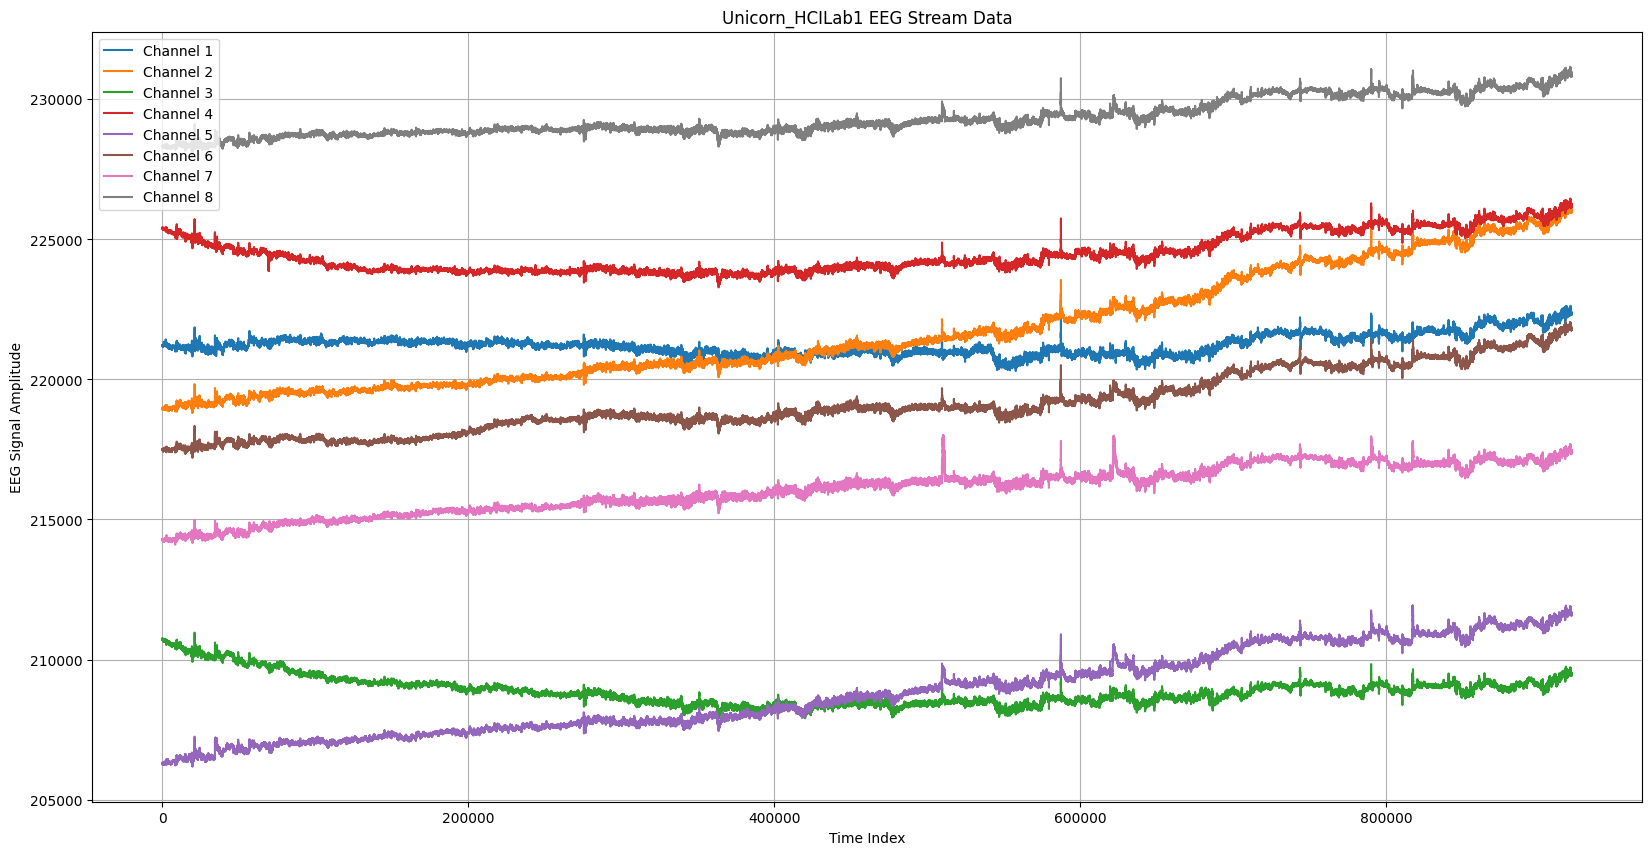

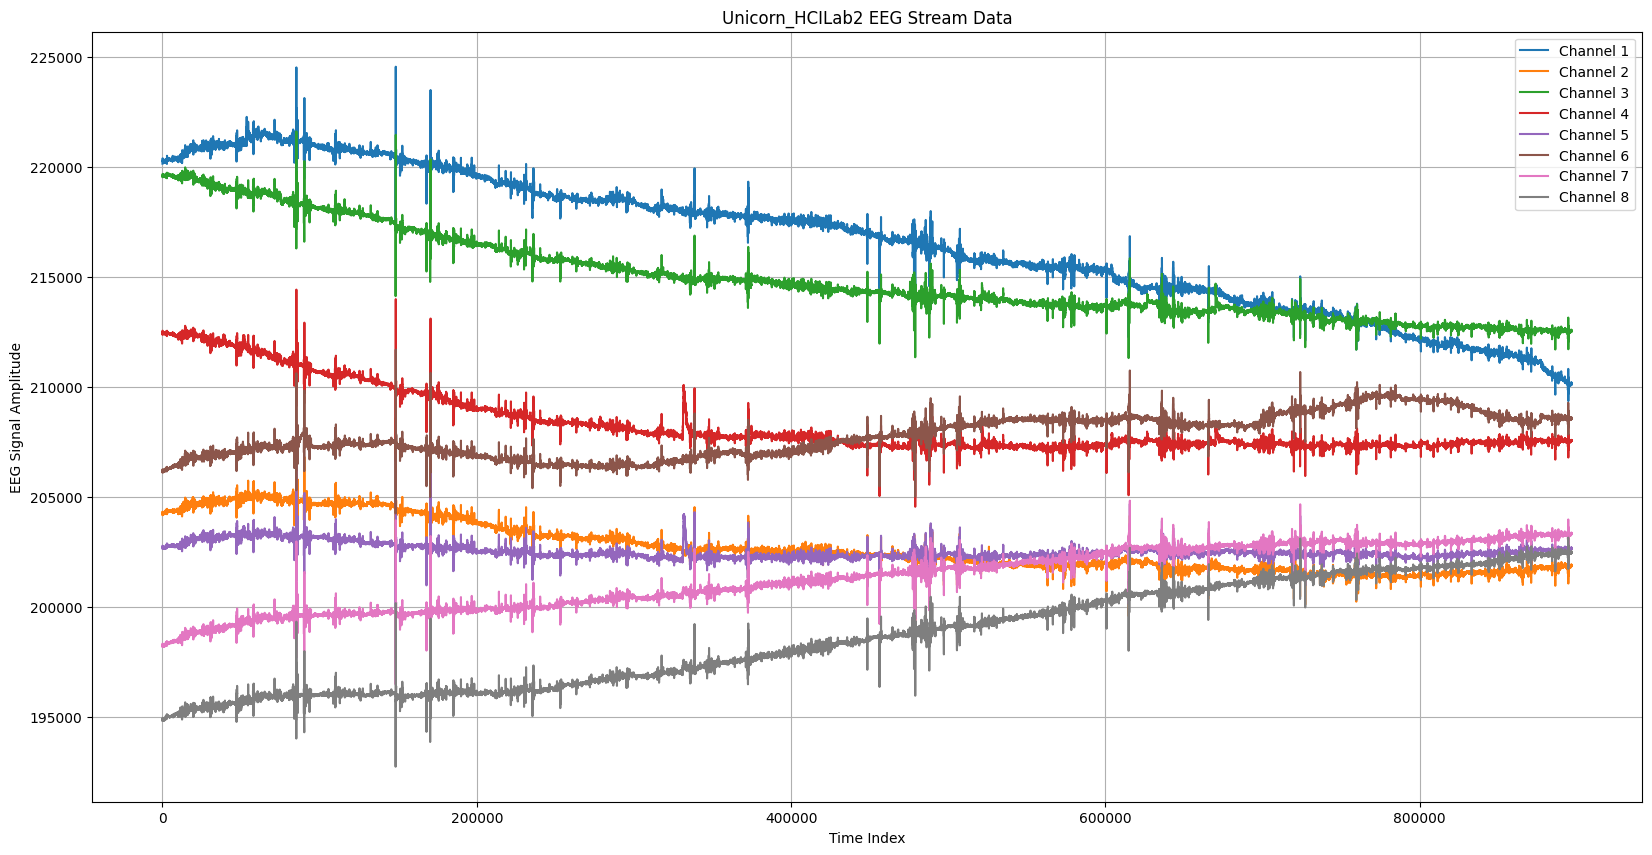

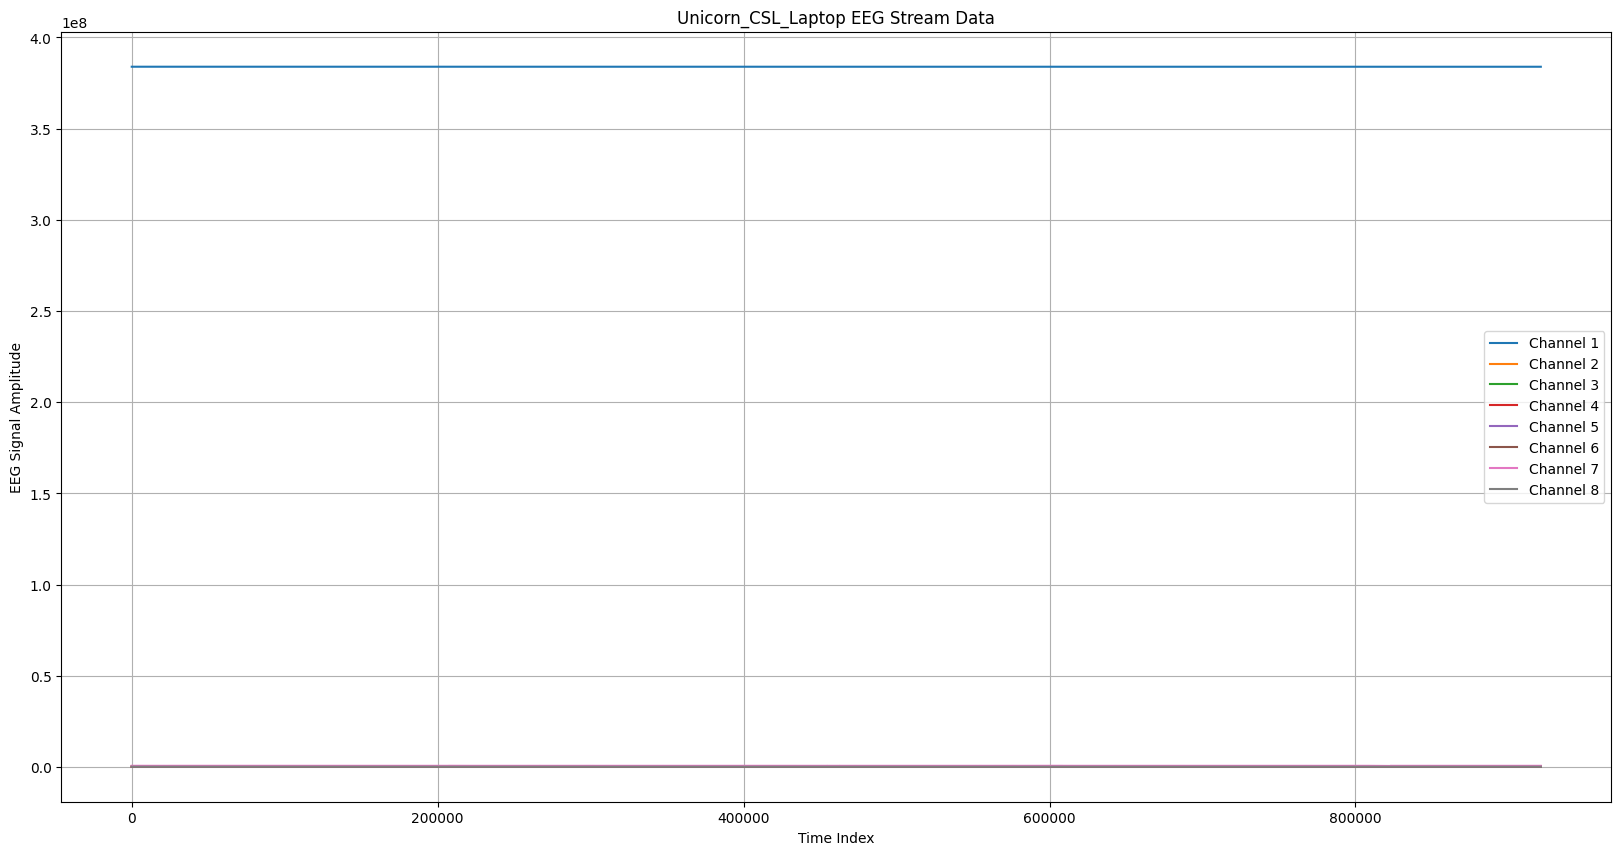

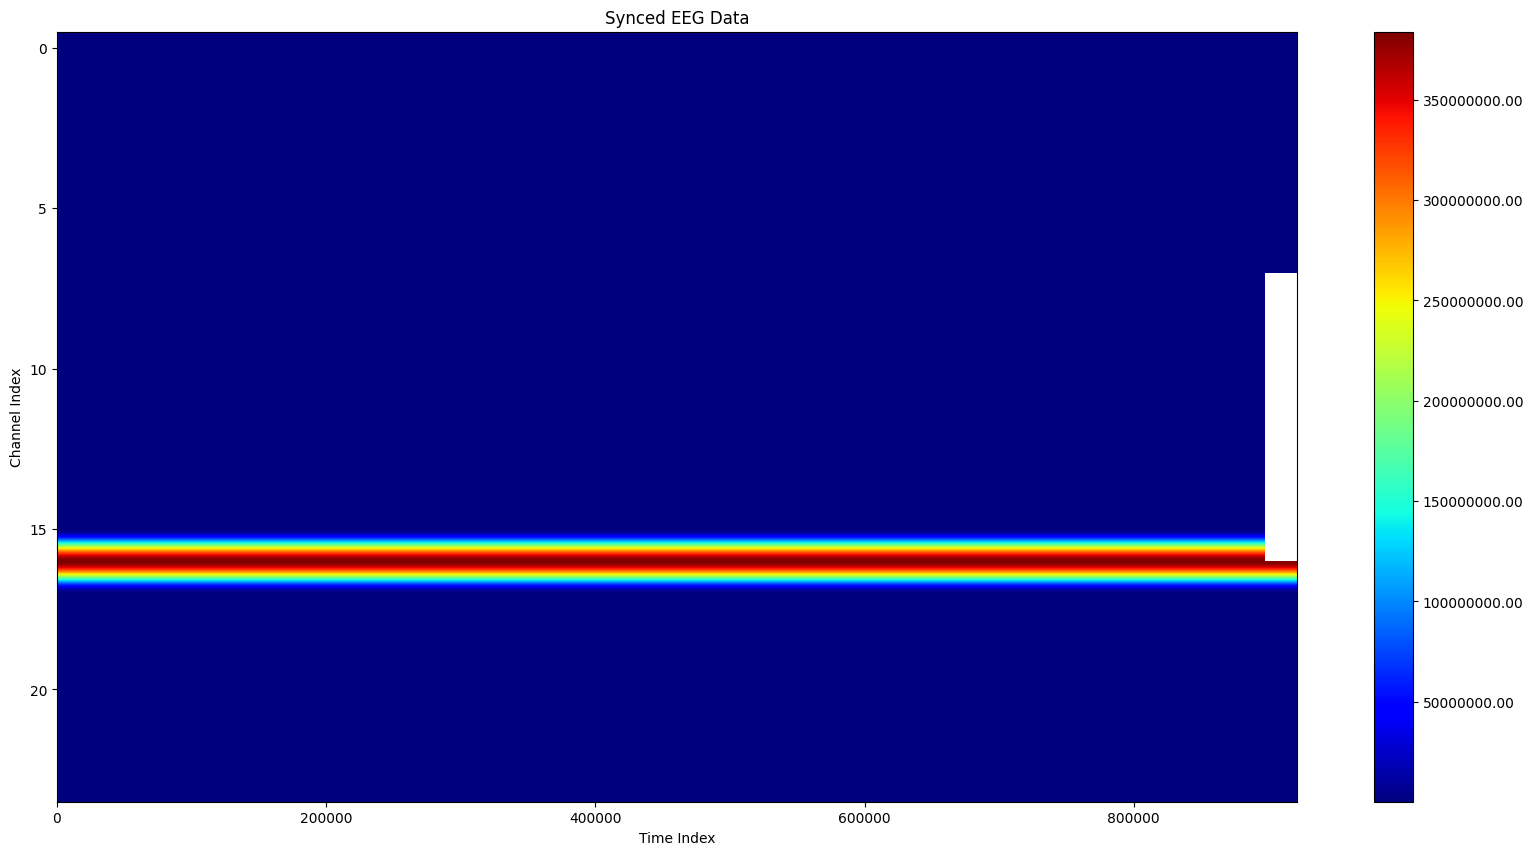

Min: 190142.265625
Max: 383932480.0
Mean: 16363664.502332797
Standard Deviation: 76997329.20602958


In [5]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, video_start_UNIX_times, task_start_UNIX_times, task_duration)
combine_streams(group_num, streams)